In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def GetSample(N=int(1e4), ncoins=3,weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [0,1]
    
    for i in range(N):
        if weights == None:
            Exp = np.random.choice(Events,ncoins)
        
        else:
            Exp = np.random.choice(Events, ncoins, p= weights)
        Sample[i] = Exp
        
    return Sample

In [4]:
N = 10000
Sample = GetSample(N,ncoins=10,weights=[0.5,0.5])

In [5]:
Frecuencias = np.array([], dtype = np.int64)
for i in range(Sample.shape[0]):
    NCaras = 0
    for j in range(Sample.shape[1]):
        if Sample[i,j] == 0:
            NCaras += 1
            
    Frecuencias = np.append(Frecuencias,NCaras)

(array([0.0017, 0.008 , 0.0467, 0.1164, 0.2136, 0.2385, 0.2015, 0.1189,
        0.044 , 0.0107]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

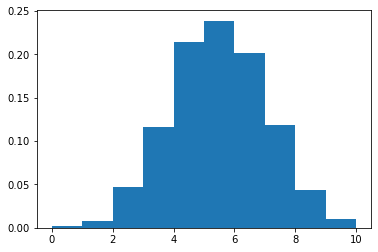

In [6]:
plt.hist(Frecuencias,density=True)

In [7]:
ii = np.where( Frecuencias == 2)
Events = len(Frecuencias[ii])
print(Events, Events/N, 3/8)

467 0.0467 0.375


In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import sympy as sym
from tqdm import tqdm
import matplotlib.pyplot as plt


In [9]:
x, y = sym.symbols('x, y', real = True)
z = x + sym.I*y

function = lambda z: z**3 - 1
F = [sym.re(function(z)), sym.im(function(z))]
J = [[sym.diff(F[0],x), sym.diff(F[0],y)],[sym.diff(F[1],x),sym.diff(F[1],y)]]
sym.Matrix(J)

Fn = sym.lambdify([x, y], F, 'numpy')
Jn = sym.lambdify([x, y], J, 'numpy')

def NewtonRhapson(z0, Fn, Jn, max_it = 10000, tol = 1e-7):
    for it in range(max_it):
        if np.linalg.det(Jn(z0[0], z0[1])) != 0:
            Jn_1 = np.linalg.inv(Jn(z0[0], z0[1]))
            Fn_1 = Fn(z0[0], z0[1])
            zn = z0 - np.dot(Jn_1, Fn_1)
        if np.linalg.norm(zn - z0) < tol:
            break
        else:
            z0 = zn
    return z0

NewtonRhapson([0.5, 0.5], Fn, Jn)

array([-0.49999997,  0.86602543])

100%|██████████| 300/300 [01:11<00:00,  4.20it/s]


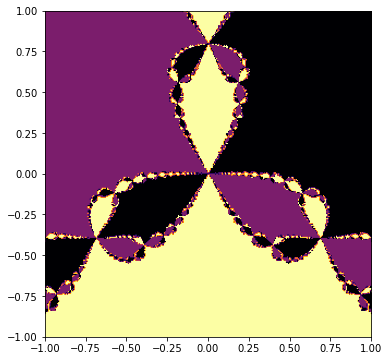

In [10]:
N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
z_roots = np.array([[-0.5, np.sqrt(3)*0.5], [-0.5, -np.sqrt(3)*0.5], [1, 0]])
index = [20, 100, 255]
Fractal = np.zeros((N, N), np.int64)

for i in tqdm(range(len(x))):
    for j in range(len(y)):
        z = NewtonRhapson([x[i], y[j]], Fn, Jn)
        for k, root in enumerate(z_roots):
            if np.linalg.norm(z - root) < 1e-7:
                Fractal[i, j] = index[k]

plt.figure(figsize = (6,6))
plt.imshow(Fractal, cmap = 'inferno', extent=[-1,1,-1,1])